# Checking Robustness

For each community finding algorithm (Louvain, Infomap, Girvan-Newman, LPA), we will run 2 types of check:
i) Generate 4 new sets of runs of the algorithm, recalculate the node features and the coassociation matrix, and rerun the random forest
ii) Generate 4 completely new sets of LFR graphs and run the entire process

In [2]:
import os
import yaml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [3]:
runs = 100

## i) New runs of the community finding algorithm

Now we run the experiment 4 times with different runs of the community finding algorithm.

### Louvain data

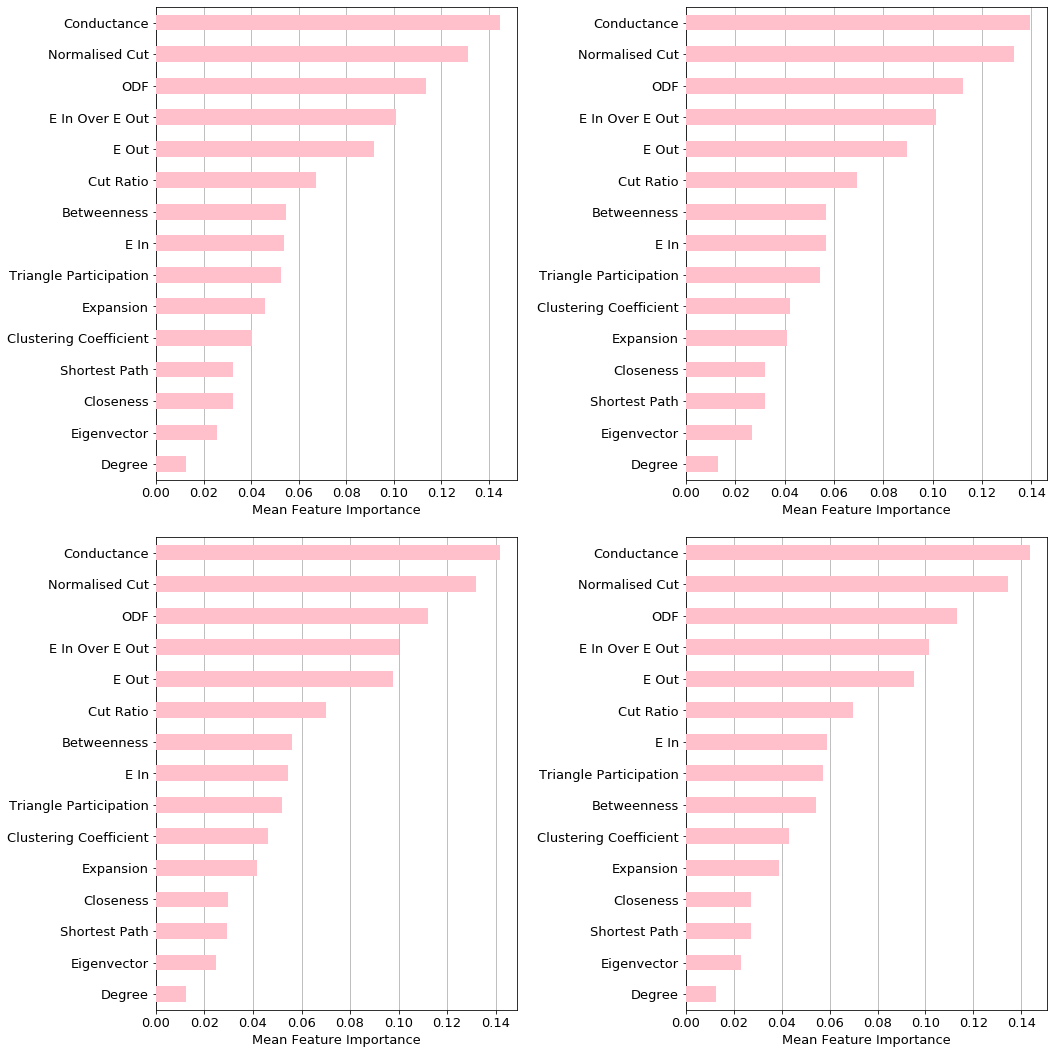

In [3]:
fig = plt.figure(figsize=(40,40))
for exp in range(4):
    
    X_train = pd.read_csv('../LFR_Graph_Data/Repeat_Data/Louvain_Data_{0}/node_x_train.csv'.format(exp+1), index_col=0)
    y_train = pd.read_csv('../LFR_Graph_Data/Repeat_Data/Louvain_Data_{0}/node_y_train.csv'.format(exp+1), index_col=0)
    
    feature_list = list(X_train.columns)
    data = np.array(X_train)
    labels = np.squeeze(np.array(y_train))

    accuracy_scores = []
    feature_importances = {}
    for f in feature_list:
        feature_importances[f] = []
    rows = []

    skf = StratifiedKFold(n_splits=5)
    rf = RandomForestClassifier()

    fold_count = 0

    for run in range(1, runs+1):

        for i in range(5):

            fold_count += 1

            folds = next(skf.split(data, labels), None)

            X_train_fold = data[folds[0], :]
            X_val_fold = data[folds[1], :]
            y_train_fold = labels[folds[0]]
            y_val_fold = labels[folds[1]]

            model = rf.fit(X_train_fold, y_train_fold)
            predictions = rf.predict(X_val_fold)

            accuracy_scores.append(metrics.accuracy_score(y_val_fold, predictions))

            row = {"run": fold_count}
            for j, feature in enumerate(feature_list):
                row[feature] = rf.feature_importances_[j]
            rows.append(row)
    df_importances = pd.DataFrame(rows).set_index("run")
    feature_ranking = df_importances.mean().sort_values(ascending=False)
    ax = fig.add_subplot(2,2,exp+1)
    feature_ranking[::-1].plot.barh(fontsize=13, figsize=(15,15), color="pink", zorder=3)
    ax.set_xlabel("Mean Feature Importance", fontsize=13)
    ax.xaxis.grid()
fig.tight_layout(pad=2)

### Infomap data

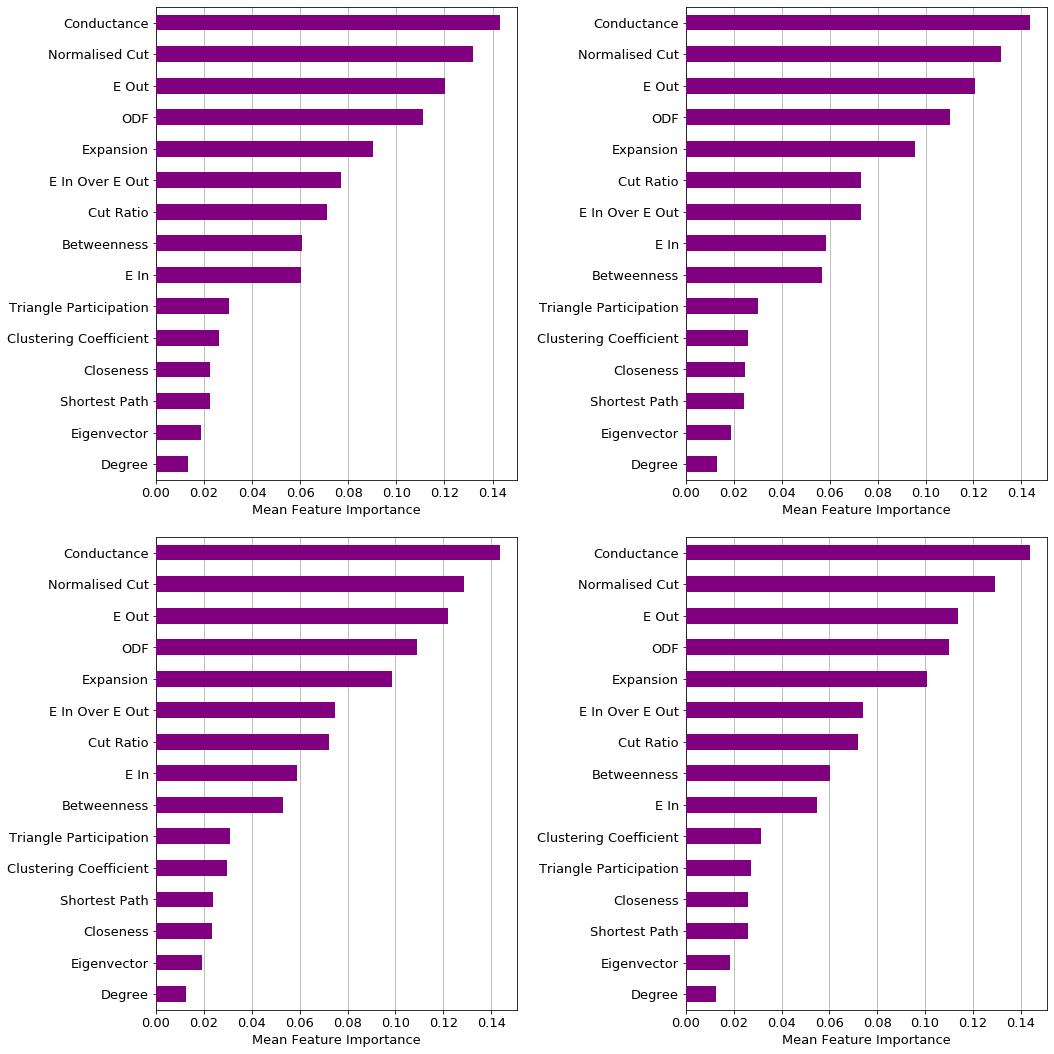

In [4]:
fig = plt.figure(figsize=(40,40))
for exp in range(4):
    
    X_train = pd.read_csv('../LFR_Graph_Data/Repeat_Data/Infomap_Data_{0}/node_x_train.csv'.format(exp+1), index_col=0)
    y_train = pd.read_csv('../LFR_Graph_Data/Repeat_Data/Infomap_Data_{0}/node_y_train.csv'.format(exp+1), index_col=0)
    
    feature_list = list(X_train.columns)
    data = np.array(X_train)
    labels = np.squeeze(np.array(y_train))

    accuracy_scores = []
    feature_importances = {}
    for f in feature_list:
        feature_importances[f] = []
    rows = []

    skf = StratifiedKFold(n_splits=5)
    rf = RandomForestClassifier()

    fold_count = 0

    for run in range(1, runs+1):

        for i in range(5):

            fold_count += 1

            folds = next(skf.split(data, labels), None)

            X_train_fold = data[folds[0], :]
            X_val_fold = data[folds[1], :]
            y_train_fold = labels[folds[0]]
            y_val_fold = labels[folds[1]]

            model = rf.fit(X_train_fold, y_train_fold)
            predictions = rf.predict(X_val_fold)

            accuracy_scores.append(metrics.accuracy_score(y_val_fold, predictions))

            row = {"run": fold_count}
            for j, feature in enumerate(feature_list):
                row[feature] = rf.feature_importances_[j]
            rows.append(row)
    df_importances = pd.DataFrame(rows).set_index("run")
    feature_ranking = df_importances.mean().sort_values(ascending=False)
    ax = fig.add_subplot(2,2,exp+1)
    feature_ranking[::-1].plot.barh(fontsize=13, figsize=(15,15), color="purple", zorder=3)
    ax.set_xlabel("Mean Feature Importance", fontsize=13)
    ax.xaxis.grid()
fig.tight_layout(pad=2)

## LPA Data

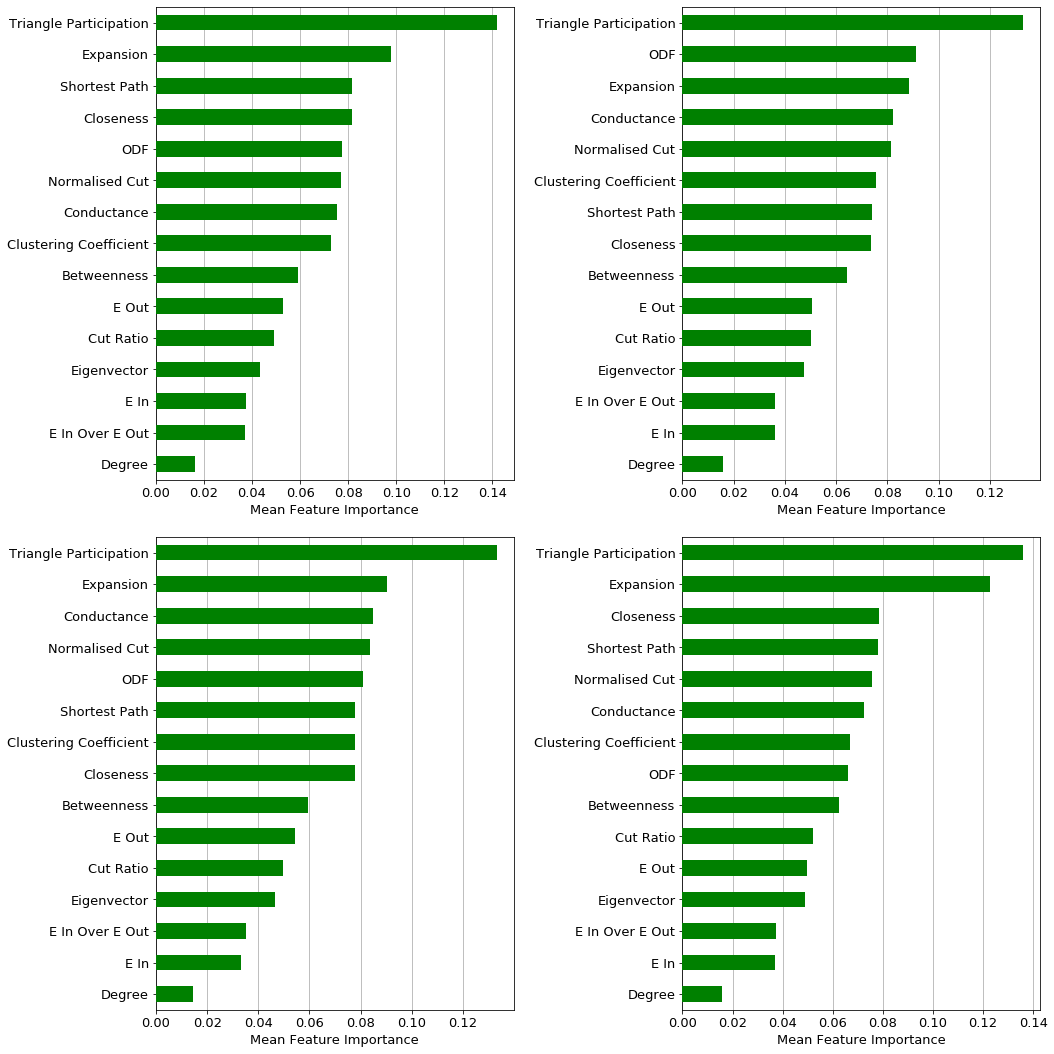

In [5]:
fig = plt.figure(figsize=(40,40))
for exp in range(4):
    
    X_train = pd.read_csv('../LFR_Graph_Data/Repeat_Data/LPA_Data_{0}/node_x_train.csv'.format(exp+1), index_col=0)
    y_train = pd.read_csv('../LFR_Graph_Data/Repeat_Data/LPA_Data_{0}/node_y_train.csv'.format(exp+1), index_col=0)
    
    feature_list = list(X_train.columns)
    data = np.array(X_train)
    labels = np.squeeze(np.array(y_train))

    accuracy_scores = []
    feature_importances = {}
    for f in feature_list:
        feature_importances[f] = []
    rows = []

    skf = StratifiedKFold(n_splits=5)
    rf = RandomForestClassifier()

    fold_count = 0

    for run in range(1, runs+1):

        for i in range(5):

            fold_count += 1

            folds = next(skf.split(data, labels), None)

            X_train_fold = data[folds[0], :]
            X_val_fold = data[folds[1], :]
            y_train_fold = labels[folds[0]]
            y_val_fold = labels[folds[1]]

            model = rf.fit(X_train_fold, y_train_fold)
            predictions = rf.predict(X_val_fold)

            accuracy_scores.append(metrics.accuracy_score(y_val_fold, predictions))

            row = {"run": fold_count}
            for j, feature in enumerate(feature_list):
                row[feature] = rf.feature_importances_[j]
            rows.append(row)
    df_importances = pd.DataFrame(rows).set_index("run")
    feature_ranking = df_importances.mean().sort_values(ascending=False)
    ax = fig.add_subplot(2,2,exp+1)
    feature_ranking[::-1].plot.barh(fontsize=13, figsize=(15,15), color="green", zorder=3)
    ax.set_xlabel("Mean Feature Importance", fontsize=13)
    ax.xaxis.grid()
fig.tight_layout(pad=2)

## ii) Completely new LFR Graphs

Now for each algorithm, we run four random forests on four sets of different LFR graphs. Each of these 4 are different to the set of graphs used for all the above experiments.

### Louvain data

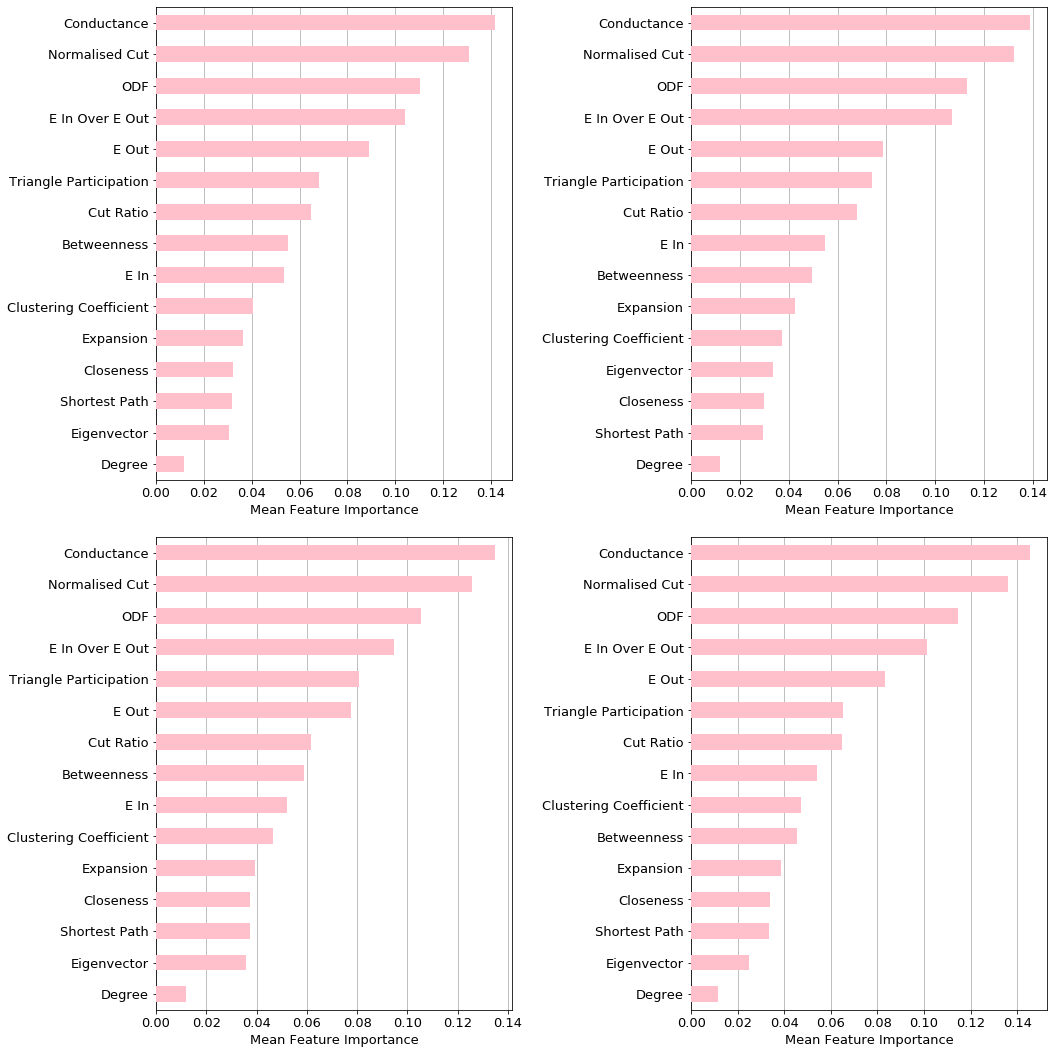

In [4]:
fig = plt.figure(figsize=(40,40))
for exp in range(4):
    
    X_train = pd.read_csv('../Repeat_Graph_Data/LFR_Graphs_{0}/Louvain_Data/node_x_train.csv'.format(exp+1), index_col=0)
    y_train = pd.read_csv('../Repeat_Graph_Data/LFR_Graphs_{0}/Louvain_Data/node_y_train.csv'.format(exp+1), index_col=0)
    
    feature_list = list(X_train.columns)
    data = np.array(X_train)
    labels = np.squeeze(np.array(y_train))

    accuracy_scores = []
    feature_importances = {}
    for f in feature_list:
        feature_importances[f] = []
    rows = []

    skf = StratifiedKFold(n_splits=5)
    rf = RandomForestClassifier()

    fold_count = 0

    for run in range(1, runs+1):

        for i in range(5):

            fold_count += 1

            folds = next(skf.split(data, labels), None)

            X_train_fold = data[folds[0], :]
            X_val_fold = data[folds[1], :]
            y_train_fold = labels[folds[0]]
            y_val_fold = labels[folds[1]]

            model = rf.fit(X_train_fold, y_train_fold)
            predictions = rf.predict(X_val_fold)

            accuracy_scores.append(metrics.accuracy_score(y_val_fold, predictions))

            row = {"run": fold_count}
            for j, feature in enumerate(feature_list):
                row[feature] = rf.feature_importances_[j]
            rows.append(row)
    df_importances = pd.DataFrame(rows).set_index("run")
    feature_ranking = df_importances.mean().sort_values(ascending=False)
    ax = fig.add_subplot(2,2,exp+1)
    feature_ranking[::-1].plot.barh(fontsize=13, figsize=(15,15), color="pink", zorder=3)
    ax.set_xlabel("Mean Feature Importance", fontsize=13)
    ax.xaxis.grid()
fig.tight_layout(pad=2)

### Infomap data

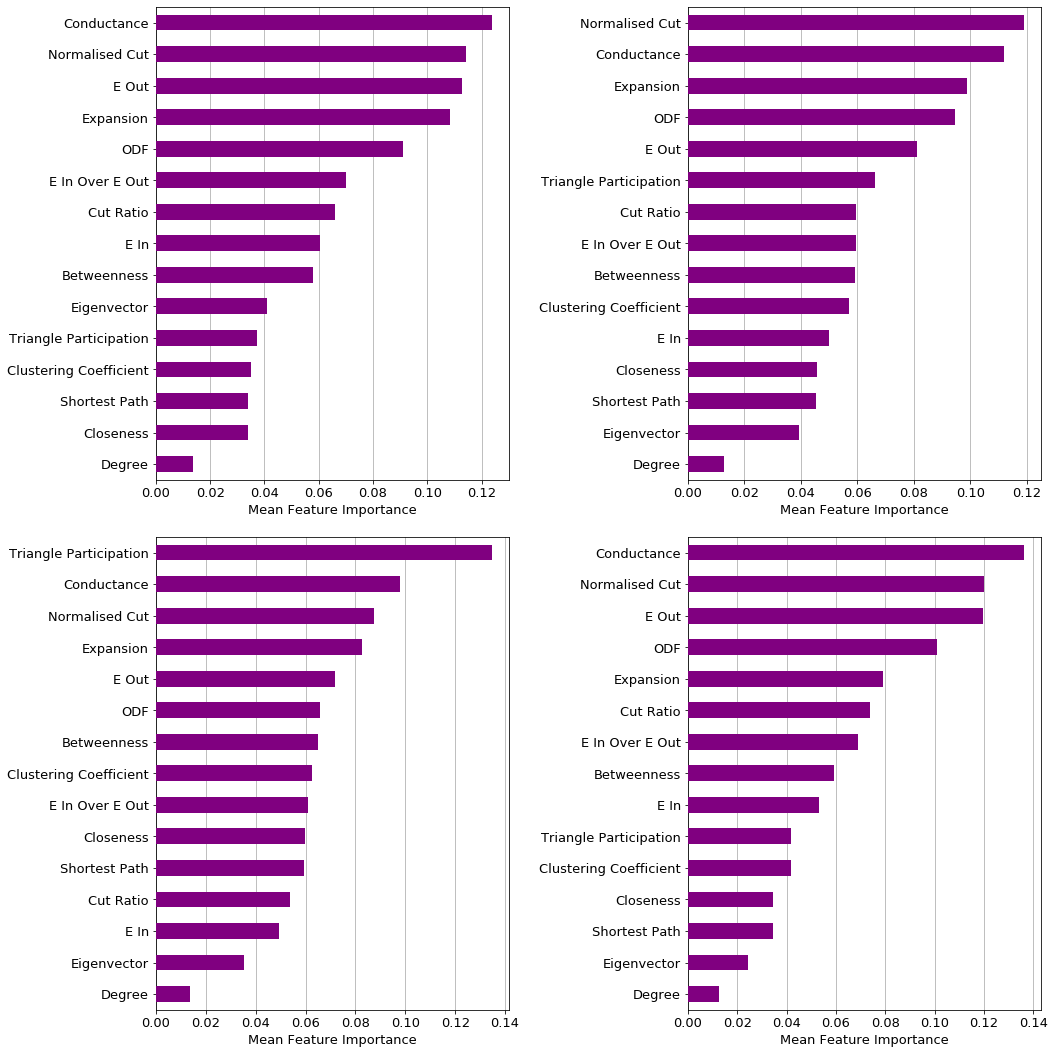

In [8]:
fig = plt.figure(figsize=(40,40))
for exp in range(4):
    
    X_train = pd.read_csv('../Repeat_Graph_Data/LFR_Graphs_{0}/Infomap_Data/node_x_train.csv'.format(exp+1), index_col=0)
    y_train = pd.read_csv('../Repeat_Graph_Data/LFR_Graphs_{0}/Infomap_Data/node_y_train.csv'.format(exp+1), index_col=0)
    
    feature_list = list(X_train.columns)
    data = np.array(X_train)
    labels = np.squeeze(np.array(y_train))

    accuracy_scores = []
    feature_importances = {}
    for f in feature_list:
        feature_importances[f] = []
    rows = []

    skf = StratifiedKFold(n_splits=5)
    rf = RandomForestClassifier()

    fold_count = 0

    for run in range(1, runs+1):

        for i in range(5):

            fold_count += 1

            folds = next(skf.split(data, labels), None)

            X_train_fold = data[folds[0], :]
            X_val_fold = data[folds[1], :]
            y_train_fold = labels[folds[0]]
            y_val_fold = labels[folds[1]]

            model = rf.fit(X_train_fold, y_train_fold)
            predictions = rf.predict(X_val_fold)

            accuracy_scores.append(metrics.accuracy_score(y_val_fold, predictions))

            row = {"run": fold_count}
            for j, feature in enumerate(feature_list):
                row[feature] = rf.feature_importances_[j]
            rows.append(row)
    df_importances = pd.DataFrame(rows).set_index("run")
    feature_ranking = df_importances.mean().sort_values(ascending=False)
    ax = fig.add_subplot(2,2,exp+1)
    feature_ranking[::-1].plot.barh(fontsize=13, figsize=(15,15), color="purple", zorder=3)
    ax.set_xlabel("Mean Feature Importance", fontsize=13)
    ax.xaxis.grid()
fig.tight_layout(pad=2)

## LPA Data

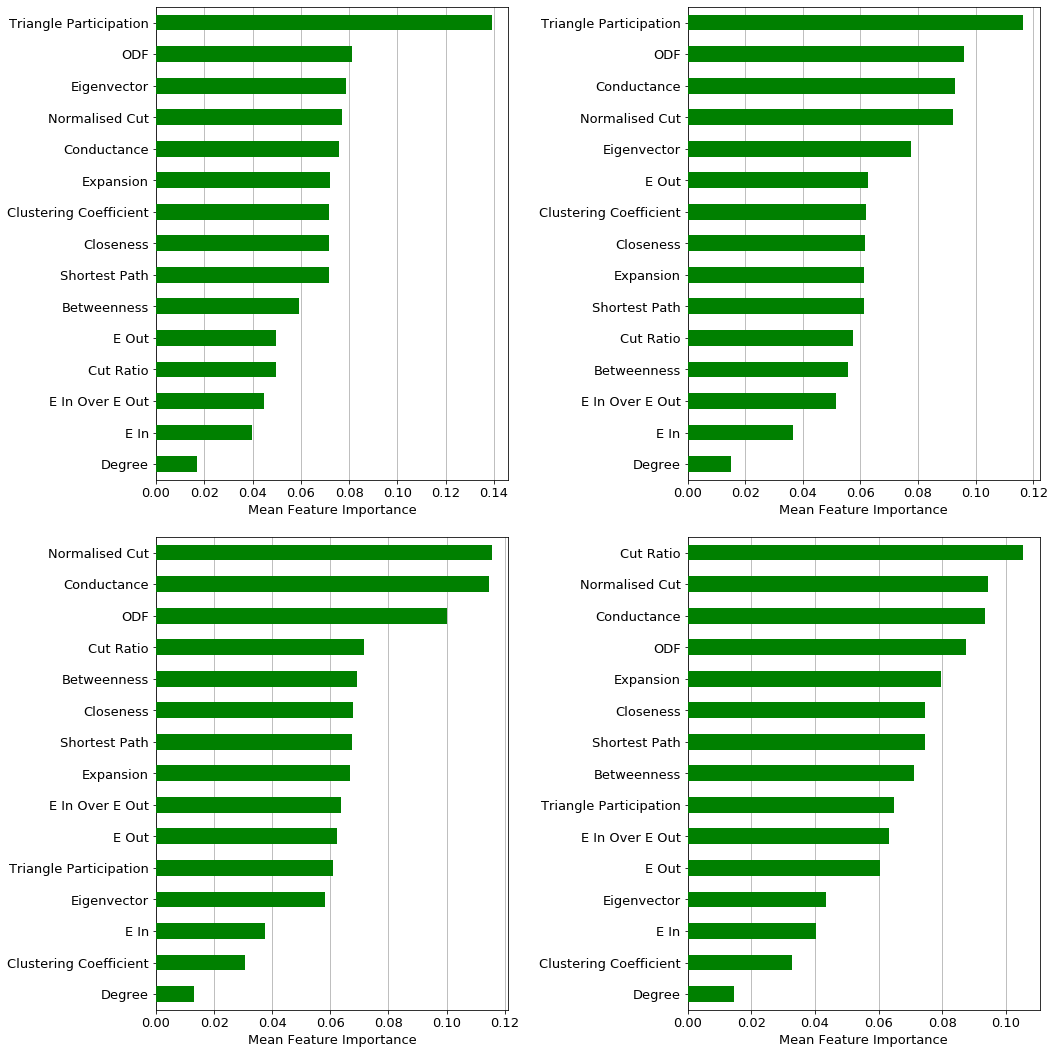

In [10]:
fig = plt.figure(figsize=(40,40))
for exp in range(4):
    
    X_train = pd.read_csv('../Repeat_Graph_Data/LFR_Graphs_{0}/LPA_Data/node_x_train.csv'.format(exp+1), index_col=0)
    y_train = pd.read_csv('../Repeat_Graph_Data/LFR_Graphs_{0}/LPA_Data/node_y_train.csv'.format(exp+1), index_col=0)
    
    feature_list = list(X_train.columns)
    data = np.array(X_train)
    labels = np.squeeze(np.array(y_train))

    accuracy_scores = []
    feature_importances = {}
    for f in feature_list:
        feature_importances[f] = []
    rows = []

    skf = StratifiedKFold(n_splits=5)
    rf = RandomForestClassifier()

    fold_count = 0

    for run in range(1, runs+1):

        for i in range(5):

            fold_count += 1

            folds = next(skf.split(data, labels), None)

            X_train_fold = data[folds[0], :]
            X_val_fold = data[folds[1], :]
            y_train_fold = labels[folds[0]]
            y_val_fold = labels[folds[1]]

            model = rf.fit(X_train_fold, y_train_fold)
            predictions = rf.predict(X_val_fold)

            accuracy_scores.append(metrics.accuracy_score(y_val_fold, predictions))

            row = {"run": fold_count}
            for j, feature in enumerate(feature_list):
                row[feature] = rf.feature_importances_[j]
            rows.append(row)
    df_importances = pd.DataFrame(rows).set_index("run")
    feature_ranking = df_importances.mean().sort_values(ascending=False)
    ax = fig.add_subplot(2,2,exp+1)
    feature_ranking[::-1].plot.barh(fontsize=13, figsize=(15,15), color="green", zorder=3)
    ax.set_xlabel("Mean Feature Importance", fontsize=13)
    ax.xaxis.grid()
fig.tight_layout(pad=2)